In [2]:
# download the libraries
import pandas as pd
from pandas import Series,DataFrame
import warnings
import os
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import random
from pandas.io.json import json_normalize
%matplotlib inline

In [3]:
df_train = pd.read_pickle('train_flat_no_hits.pkl')

In [3]:
df_train.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,customDimension.index,customDimension.value
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,EMEA
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,North America
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,North America
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,EMEA
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Central America


In [ ]:
#checking missing values- sample

In [5]:
df_train.isnull().sum().sort_values(ascending = False)

trafficSource.campaignCode                           1708336
totals.transactionRevenue                            1689823
totals.totalTransactionRevenue                       1689823
totals.transactions                                  1689778
trafficSource.adContent                              1643600
trafficSource.adwordsClickInfo.isVideoAd             1633063
trafficSource.adwordsClickInfo.adNetworkType         1633063
trafficSource.adwordsClickInfo.slot                  1633063
trafficSource.adwordsClickInfo.page                  1633063
trafficSource.adwordsClickInfo.gclId                 1632914
trafficSource.isTrueDirect                           1173819
trafficSource.referralPath                           1142073
trafficSource.keyword                                1052780
totals.timeOnSite                                     874294
totals.bounces                                        836759
totals.sessionQualityDim                              835274
totals.newVisits        

In [ ]:
#convert date columns so that we can actually use it

In [16]:
df_train['date'] = pd.to_datetime(df_train["date"], format="%Y%m%d") #convert to datetime
df_train['year'] = df_train['date'].dt.year #for year
df_train['day'] = df_train.date.dt.day_name() #for day
df_train['week'] = df_train.date.dt.weekofyear #week
df_train['month'] = df_train.date.dt.month_name() #month

In [5]:
df_train.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,customDimension.index,customDimension.value,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,Central America,2017,Monday,42,October


In [ ]:
#cheak our data types

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 60 columns):
 #   Column                                             Dtype         
---  ------                                             -----         
 0   channelGrouping                                    object        
 1   date                                               datetime64[ns]
 2   fullVisitorId                                      object        
 3   socialEngagementType                               object        
 4   visitId                                            int64         
 5   visitNumber                                        int64         
 6   visitStartTime                                     int64         
 7   device.browser                                     object        
 8   device.browserVersion                              object        
 9   device.browserSize                                 object        
 10  device.operatingSystem        

In [ ]:
#we have bool(1), datetime64[ns](1), int64(3), object(55)

In [ ]:
#sample anaylsis

In [5]:
df_train['device.browser']

0                  Firefox
1                   Chrome
2                   Chrome
3                   Chrome
4                   Chrome
                ...       
1708332             Chrome
1708333             Chrome
1708334    Android Webview
1708335             Chrome
1708336             Chrome
Name: device.browser, Length: 1708337, dtype: object

In [21]:
df_train.isna().sum().sort_values(ascending = False)

trafficSource.campaignCode        1708336
totals.transactionRevenue         1689823
totals.totalTransactionRevenue    1689823
totals.transactions               1689778
trafficSource.adContent           1643600
                                   ...   
geoNetwork.metro                        0
geoNetwork.region                       0
geoNetwork.country                      0
geoNetwork.subContinent                 0
channelGrouping                         0
Length: 64, dtype: int64

In [22]:
df_train['totals.transactionRevenue'].value_counts()

16990000     308
19990000     248
39980000     220
18990000     219
21990000     211
            ... 
171150000      1
106660000      1
242970000      1
18450000       1
824680000      1
Name: totals.transactionRevenue, Length: 7251, dtype: int64

In [6]:
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].astype('float')

In [10]:
df_train["totals.transactionRevenue"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1708332    0.0
1708333    0.0
1708334    0.0
1708335    0.0
1708336    0.0
Name: totals.transactionRevenue, Length: 1708337, dtype: float64

In [9]:
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].fillna(0.0).astype(float)

In [12]:
df_train["totals.transactionRevenue"].isna().sum()

0

In [13]:
df_train["totals.transactionRevenue"].isnull().sum()

0

In [15]:
print("Transaction Revenue Mean Value: ", df_train['totals.transactionRevenue'].mean())
print("Transaction Revenue median Value: ", df_train['totals.transactionRevenue'].median())

Transaction Revenue Mean Value:  1355906.3463473541
Transaction Revenue median Value:  0.0


In [21]:
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value of above 0
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value of above 0

Transaction Revenue Mean Value:  125113156.53019337
Transaction Revenue Median Value:  46060000.0


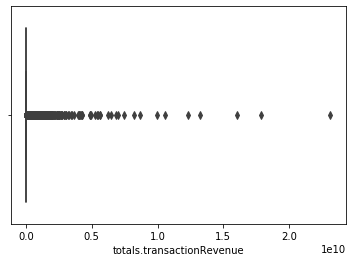

In [20]:
sns.boxplot(df_train["totals.transactionRevenue"])

In [22]:
df_train['device.browser'].value_counts() #users per device browser

Chrome                                                  1173056
Safari                                                   312165
Firefox                                                   63845
Internet Explorer                                         35474
Android Webview                                           34266
                                                         ...   
;__CT_JOB_ID__:a24a8978-e5e8-4dc9-af66-c4ed89ea25d7;          1
starmaker                                                     1
wncrmxukofqljsgvzahiybpdet                                    1
;__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;          1
;__CT_JOB_ID__:65da7e5f-0f05-4b5d-8d31-1f4d470a2b82;          1
Name: device.browser, Length: 129, dtype: int64

In [23]:
df_train['device.browser'].value_counts()[:10] #users per device browser - Top 10

Chrome               1173056
Safari                312165
Firefox                63845
Internet Explorer      35474
Android Webview        34266
Edge                   20543
Samsung Internet       15792
Opera Mini             15018
Safari (in-app)        14207
Opera                   9585
Name: device.browser, dtype: int64

In [39]:
browser_show = df_train['device.browser'].value_counts()[:10].reset_index()

In [40]:
browser_show

,index,device.browser
0,Chrome,1173056
1,Safari,312165
2,Firefox,63845
3,Internet Explorer,35474
4,Android Webview,34266
5,Edge,20543
6,Samsung Internet,15792
7,Opera Mini,15018
8,Safari (in-app),14207
9,Opera,9585


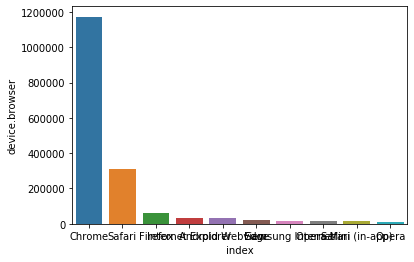

In [42]:
sns.barplot(x ='index', y= 'device.browser', data = browser_show)

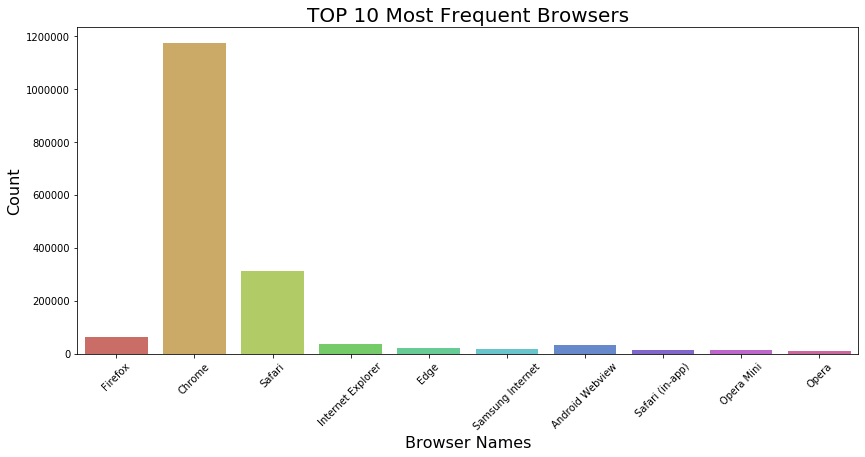

In [43]:

plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [67]:
by_day = df_train.groupby(['day'])['visitId'].count().reset_index()
by_day

,day,visitId
0,Friday,239216
1,Monday,264168
2,Saturday,183999
3,Sunday,191115
4,Thursday,268463
5,Tuesday,279675
6,Wednesday,281701


In [76]:
by_month = df_train.groupby(['month'])['visitId'].count().reset_index()
by_month

,month,visitId
0,April,149727
1,August,159561
2,December,176228
3,February,145196
4,January,148084
5,July,71812
6,June,63578
7,March,164020
8,May,65371
9,November,207661


In [70]:
by_week = df_train.groupby(['week'])['visitId'].count().sort_values(ascending = False)
by_week
by_week_top_10 = by_week.head(10).reset_index()
by_week_top_10

,week,visitId
0,50,53842
1,48,50163
2,46,49175
3,45,48982
4,40,48555
5,43,47509
6,47,45931
7,42,45577
8,44,44981
9,49,41914


In [78]:
by_year = df_train.groupby(['year'])['visitId'].count().reset_index()
by_year

,year,visitId
0,2016,436393
1,2017,928860
2,2018,343084


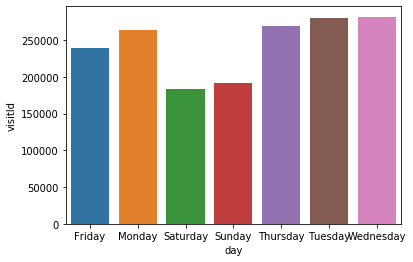

In [72]:
sns.barplot(x ='day', y= 'visitId', data = by_day)

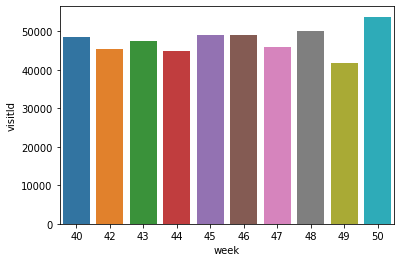

In [73]:
sns.barplot(x ='week', y= 'visitId', data = by_week_top_10)

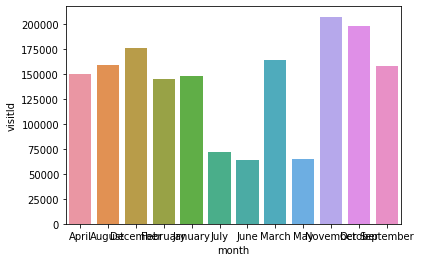

In [77]:
sns.barplot(x ='month', y= 'visitId', data = by_month)

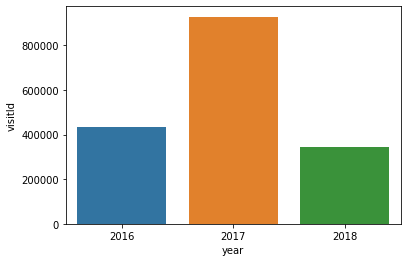

In [79]:
sns.barplot(x ='year', y= 'visitId', data = by_year)

In [ ]:
# let me begin working on the whole data
# better understanding of missing data
# I define a function for it

In [19]:
def values_missing(check):
    total = check.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (check.isnull().sum() / check.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total and percent of missing values: ")
    print (df_train[~(df_train['Total'] == 0)]) # Returning values of nulls different of 0
    
    return

In [16]:
#input my dataset

In [17]:
#values_missing(df_train)

Total and percent of missing values: 
                                                Total    Percent
trafficSource.campaignCode                    1708336  99.999941
totals.transactionRevenue                     1689823  98.916256
totals.totalTransactionRevenue                1689823  98.916256
totals.transactions                           1689778  98.913622
trafficSource.adContent                       1643600  96.210525
trafficSource.adwordsClickInfo.adNetworkType  1633063  95.593727
trafficSource.adwordsClickInfo.page           1633063  95.593727
trafficSource.adwordsClickInfo.slot           1633063  95.593727
trafficSource.adwordsClickInfo.isVideoAd      1633063  95.593727
trafficSource.adwordsClickInfo.gclId          1632914  95.585005
trafficSource.isTrueDirect                    1173819  68.711209
trafficSource.referralPath                    1142073  66.852910
trafficSource.keyword                         1052780  61.626014
totals.timeOnSite                              87429

In [18]:
df_train

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,customDimension.index,customDimension.value,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,Central America,2017,Monday,42,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708332,Social,2017-01-04,5123779100307500332,Not Socially Engaged,1483554750,1,1483554750,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,Wednesday,1,January
1708333,Social,2017-01-04,7231728964973959842,Not Socially Engaged,1483543798,1,1483543798,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,Wednesday,1,January
1708334,Social,2017-01-04,5744576632396406899,Not Socially Engaged,1483526434,1,1483526434,Android Webview,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,Wednesday,1,January
1708335,Social,2017-01-04,2709355455991750775,Not Socially Engaged,1483592857,1,1483592864,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,APAC,2017,Wednesday,1,January


In [19]:
# before i fill the missing data, i will like to investigate the columns that have unique values. in my opinion these 
#these columns do not give use any useful information. to begin let see these columns

In [20]:
unique_columns = [col for col in df_train.columns if df_train[col].nunique() == 1] #Columns with just one value

# print these columns and the name of columns 
print("numbers of columns: ", len(unique_columns), "columns with 1 value")
print("label of columns: \n", unique_columns)

numbers of columns:  25 columns with 1 value
label of columns: 
 ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion', 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'totals.bounces', 'totals.newVisits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.campaignCode', 'customDimension.index']


In [21]:
#25 columns with 1 value, okay. lets see what is in these  columns before we decide if they are really useless or useless

In [34]:
# i define a function to show the columns ans a sample of the data
def see_data(data, data_type=object, limit=5): #seting the function with data,show 5 uniques if available 
    n = data.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("______________________________________________________________")
        print("Name of column ", column, ': \n', "Uniques: ", data[column].unique()[:limit], "\n",
              " | ## Total nulls: ", (round(data[column].isnull().sum() / len(data[column]) * 100,2)),
              " | ## Total unique values: ", df_train.nunique()[column]) #print the data and % of nulls)
        print("_________________________________________________________")
        
      

In [43]:
#see_data(df_train)

______________________________________________________________
Name of column  channelGrouping : 
 Uniques:  ['Organic Search' 'Referral' 'Direct' 'Paid Search' 'Display'] 
  | ## Total nulls:  0.0  | ## Total unique values:  8
_________________________________________________________
______________________________________________________________
Name of column  fullVisitorId : 
 Uniques:  ['3162355547410993243' '8934116514970143966' '7992466427990357681'
 '9075655783635761930' '6960673291025684308'] 
  | ## Total nulls:  0.0  | ## Total unique values:  1323730
_________________________________________________________
______________________________________________________________
Name of column  device.browser : 
 Uniques:  ['Firefox' 'Chrome' 'Safari' 'UC Browser' 'Internet Explorer'] 
  | ## Total nulls:  0.0  | ## Total unique values:  129
_________________________________________________________
______________________________________________________________
Name of column  device.o

These are column are either not available in our dataset or the values are very unique
 - Name of column  socialEngagementType : 
 Uniques:  ['Not Socially Engaged'] 
 
- device.browserVersion : 
 Uniques:  ['not available in demo dataset']

- device.operatingSystemVersion : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  device.mobileDeviceBranding : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  device.mobileDeviceBranding : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  device.mobileDeviceModel : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  device.mobileInputSelector : 
 Uniques:  ['not available in demo dataset'] 
 
- Name of column  device.mobileDeviceInfo : 
 Uniques:  ['not available in demo dataset'] 

- Name of column  device.mobileDeviceMarketingName : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  device.flashVersion : 
 Uniques:  ['not available in demo dataset']  
 
- Name of column  device.language : 
 Uniques:  ['not available in demo dataset'] 

- Name of column  device.screenColors : 
 Uniques:  ['not available in demo dataset']

- Name of column  device.screenResolution : 
 Uniques:  ['not available in demo dataset']
 
- Name of column  geoNetwork.cityId : 
 Uniques:  ['not available in demo dataset'] 
 
- Name of column  geoNetwork.latitude : 
 Uniques:  ['not available in demo dataset']  

- Name of column  geoNetwork.longitude : 
 Uniques:  ['not available in demo dataset'] 

- Name of column  geoNetwork.networkLocation : 
 Uniques:  ['not available in demo dataset']

- Name of column  totals.visits : 
 Uniques:  ['1'] 
 
- Name of column  trafficSource.adwordsClickInfo.criteriaParameters : 
 Uniques:  ['not available in demo dataset'] 
 
 
 
'''

'''
other column that contain values that might not be useful are:
- Name of column  trafficSource.adwordsClickInfo.gclId : 
 Uniques:  [nan
 'Cj0KCQjwsZHPBRClARIsAC-VMPBHdNF2oMOgh6Xp6YhjXWSk11sDu3eCo4De_u6l4xafqgrPVPSGYdkaArkiEALw_wcB'
 'CODVoMjJ9tYCFUIvgQod_dsKEA'
 'Cj0KCQjwsZHPBRClARIsAC-VMPA4CVJtDhu1lYkB0AR1hje1goUMHQZNJMrsSWD57pLnv1KE_L7pCEcaAunKEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPDlLD6kS4tmqFGZjMUqyerwe0WDaULaAKNkj-gwuvPnLSPRyf9TN7IaArICEALw_wcB'] 
- Name of column  trafficSource.adwordsClickInfo.page : 
 Uniques:  [nan '1' '3' '2' '5']
- Name of column  trafficSource.referralPath : 
 Uniques:  [nan '/a/google.com/transportation/mtv-services/bikes/bike2workmay2016'
 '/offer/2145' '/a/google.com/nest-vision/dropcam-field-tester-program'
 '/analytics/web/'] 
- Name of column  trafficSource.campaign : 
 Uniques:  ['(not set)' '"google + redesign/Accessories March 17" All Users'
 'AW - Dynamic Search Ads Whole Site'
 '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS'
 'Data Share Promo'] 
- Name of column  trafficSource.adwordsClickInfo.slot : 
 Uniques:  [nan 'Top' 'RHS' 'Google Display Network']
 
- Name of column  trafficSource.adContent : 
 Uniques:  [nan 'Placement Accessories 300 x 250' 'Google Merchandise Store'
 'Bags 300x250' 'Display Ad created 3/11/14']  
- Name of column  trafficSource.campaignCode : 
 Uniques:  [nan '11251kjhkvahf']   

'''

After examining the values, i am choosing to drops the following:

In [13]:
drop_col_list = ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion',
                 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 
                 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 
                 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 
                 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'trafficSource.campaign', 'trafficSource.referralPath', 
                 'trafficSource.adwordsClickInfo.page','trafficSource.adwordsClickInfo.slot', 
                 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.gclId', 
                 'trafficSource.campaignCode', 'customDimension.index']

In [14]:
df_train.drop(drop_col_list, axis=1, inplace=True)  #to drop them

In [32]:
df_train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,...,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,customDimension.value,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,...,organic,water bottle,NaN,NaN,NaN,EMEA,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,...,referral,NaN,NaN,NaN,NaN,North America,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,...,(none),NaN,True,NaN,NaN,North America,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,...,organic,(not provided),NaN,NaN,NaN,EMEA,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,...,organic,(not provided),NaN,NaN,NaN,Central America,2017,Monday,42,October


Now we have 38 columns 

lets see the unique value in the remaining dataset

In [42]:
df_train.nunique()

channelGrouping                                       8
date                                                638
fullVisitorId                                   1323730
visitId                                         1665802
visitNumber                                         457
visitStartTime                                  1667423
device.browser                                      129
device.operatingSystem                               24
device.isMobile                                       2
device.deviceCategory                                 3
geoNetwork.continent                                  6
geoNetwork.subContinent                              23
geoNetwork.country                                  228
geoNetwork.region                                   483
geoNetwork.metro                                    123
geoNetwork.city                                     956
geoNetwork.networkDomain                          41982
totals.visits                                   

These have a unique value, but i feel they might be useful
- totals.visits
- totals.bounces
- totals.newVisits
- trafficSource.isTrueDirect
- trafficSource.adwordsClickInfo.isVideoAd

Now we start cleaning and filling missing data for the remaining dataset

In [44]:
#to check our data type again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 38 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   channelGrouping                               object        
 1   date                                          datetime64[ns]
 2   fullVisitorId                                 object        
 3   visitId                                       int64         
 4   visitNumber                                   int64         
 5   visitStartTime                                int64         
 6   device.browser                                object        
 7   device.operatingSystem                        object        
 8   device.isMobile                               bool          
 9   device.deviceCategory                         object        
 10  geoNetwork.continent                          object        
 11  geoNetwork.subContinent 

In [46]:
#from the previous analysis, we see that columns number_value columns are in string. we need to convert them to numeric value
# for our analysis and predictions.

In [ ]:
these columns are objects. 
totals.visits                                 object        
totals.hits                                   object        
totals.pageviews                              object        
totals.bounces                                object        
totals.newVisits                              object        
totals.sessionQualityDim                      object        
totals.timeOnSite                             object        
totals.transactions                           object        
totals.transactionRevenue                     object        
totals.totalTransactionRevenue                object   



In [ ]:
#but lets fill the nan values 


In [17]:
# I cannot inference on totals.sessionQualityDim,totals.timeOnSite while totals.transactions and totals.totalTransactionRevenue
# can be infered from totals.transactionRevenue

df_train['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1(since least for a visit to the site means 1 page seen)
df_train['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
df_train['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0(0 is suitable for Nan here)
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero


In [18]:
#To convert

df_train['totals.pageviews'] = df_train['totals.pageviews'].astype(int) # setting numerical column as integer
df_train['totals.newVisits'] = df_train['totals.newVisits'].astype(int) # setting numerical column as integer
df_train['totals.bounces'] = df_train['totals.bounces'].astype(int)  # setting numerical column as integer
df_train["totals.hits"] = df_train["totals.hits"].astype(float) # setting numerical to float
df_train['totals.visits'] = df_train['totals.visits'].astype(int) # seting as int

In [54]:
#let recheck the data
values_missing(df_train)

Total and percent of missing values: 
                                                Total    Percent
totals.totalTransactionRevenue                1689823  98.916256
totals.transactions                           1689778  98.913622
trafficSource.adwordsClickInfo.isVideoAd      1633063  95.593727
trafficSource.adwordsClickInfo.adNetworkType  1633063  95.593727
trafficSource.isTrueDirect                    1173819  68.711209
trafficSource.keyword                         1052780  61.626014
totals.timeOnSite                              874294  51.178076
totals.sessionQualityDim                       835274  48.893983
customDimension.value                          333235  19.506397


I will leave them for now and revisit them if need be.

##### Now that we have cleaned up our dataset , we can now start with getting some insight.
#### Let explore the companies sales against other variable.

In [58]:
print("Transaction Revenue Mean Value: ",df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean())

Transaction Revenue Mean Value:  125113156.53019337


Transaction Revenue Mean Value:  125113156.53019337. I had to look at the discription of the totals.transactionRevenue from
the challange.As for the amount, it is simply in USD * 1000000 (to maintain precision), so the mean revenue is 125113156/1000000 or $125.11 (among those who ended up buying something). Of course if i include all users, these numbers fell drastically

In [59]:
print("Transaction Revenue Min Value: ", 
      (df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].min())/1000000) # printing the min value
print("Transaction Revenue Mean Value: ", 
      (df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean())/1000000) # mean value
print("Transaction Revenue Median Value: ", 
      (df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median())/1000000) # median value
print("Transaction Revenue Max Value: ", 
      (df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].max())/1000000) # the max value

Transaction Revenue Min Value:  0.01
Transaction Revenue Mean Value:  125.11315653019338
Transaction Revenue Median Value:  46.06
Transaction Revenue Max Value:  23129.5


let me include all users.

In [61]:
print("Transaction Revenue Mean Value: ", (df_train['totals.transactionRevenue'].mean()/1000000))
print("Transaction Revenue median Value: ", (df_train['totals.transactionRevenue'].median()/1000000))
print("Transaction Revenue Min Value: ", (df_train['totals.transactionRevenue'].min()/1000000))
print("Transaction Revenue max Value: ", (df_train['totals.transactionRevenue'].max()/1000000))

Transaction Revenue Mean Value:  1.3559063463473542
Transaction Revenue median Value:  0.0
Transaction Revenue Min Value:  0.0
Transaction Revenue max Value:  23129.5


The result is so because over 98% of theh values were filled with 0 to represent customers that didnt buy anything there making
the real valued customer an outliers. as seen median and min is also 0.

We move to see the how the revenue distributes

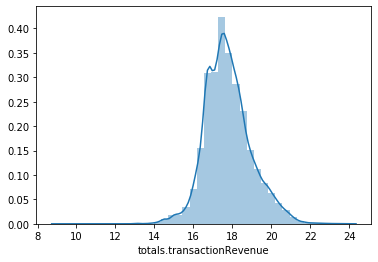

In [72]:
sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]), bins=40, kde=True)

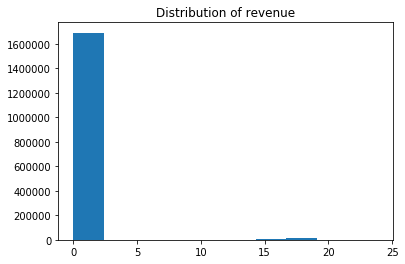

In [80]:
plt.hist(np.log1p(df_train.loc[df_train['totals.transactionRevenue'].isna() == False, 'totals.transactionRevenue']));
plt.title('Distribution of revenue');


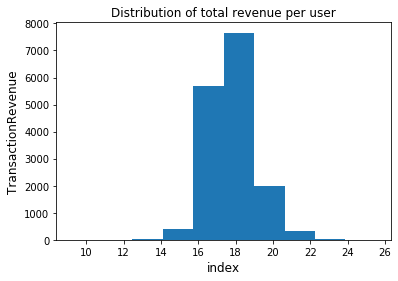

In [105]:
User_rev = df_train.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()
plt.hist(np.log(User_rev.loc[User_rev['totals.transactionRevenue'] > 0, 'totals.transactionRevenue']));
plt.title('Distribution of total revenue per user');
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [100]:
User_rev

,fullVisitorId,totals.transactionRevenue
0,0000000259678714014,0.0
1,0000010278554503158,0.0
2,0000020424342248747,0.0
3,0000027376579751715,0.0
4,0000039460501403861,0.0
...,...,...
1323725,999997550040396460,0.0
1323726,9999978264901065827,0.0
1323727,9999985820452794361,0.0
1323728,9999986437109498564,0.0


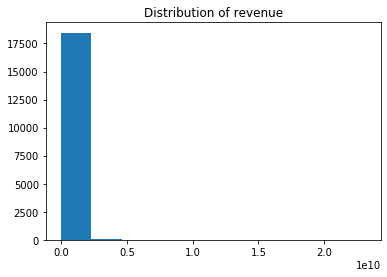

In [83]:
plt.hist(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"])#, 'totals.transactionRevenue']);
plt.title('Distribution of revenue');

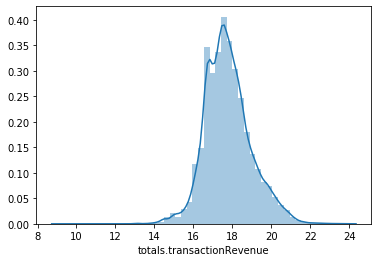

In [90]:
sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]), kde=True)

In [8]:
best_users_count = df_train.groupby('fullVisitorId')['totals.transactionRevenue'].value_counts().sort_values(ascending=False).head(10)#.reset_index()
#[df_train[df_train['totals.transactionRevenue'] > 0]].value_counts()
best_users_count

fullVisitorId        totals.transactionRevenue
2811132188167803677  3500000                      5
7813149961404844386  39990000                     5
1659812380310464091  8790000                      3
1581909009423007722  164320000                    3
4647505914839180188  30390000                     3
4085972867127024343  19190000                     3
1596912606849218999  3500000                      3
2411322974724385937  19190000                     3
3641610323245291358  41590000                     3
7813149961404844386  44790000                     2
Name: totals.transactionRevenue, dtype: int64

I paused here to focus on the ML pipeline. 
So far i have clean 80% of the dataset except for :
Total and percent of missing values: 
                                                Total    Percent
totals.totalTransactionRevenue                1689823  98.916256

totals.transactions                           1689778  98.913622

trafficSource.adwordsClickInfo.isVideoAd      1633063  95.593727

trafficSource.adwordsClickInfo.adNetworkType  1633063  95.593727

trafficSource.isTrueDirect                    1173819  68.711209

trafficSource.keyword                         1052780  61.626014

totals.timeOnSite                              874294  51.178076

totals.sessionQualityDim                       835274  48.893983

customDimension.value                          333235  19.506397

I will convert and fill trafficSource.adwordsClickInfo.isVideoAd and trafficSource.isTrueDirect
 i will drop trafficSource.adwordsClickInfo.adNetworkType,totals.timeOnSite,totals.sessionQualityDim and customDimension.value
 becasue they i can find similar values on other columns or i simply can't find a use for them or what to fill them with


 

In [9]:
    df_train['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
    df_train['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean is its NAn

In [10]:
new_drop_col_list = ['trafficSource.adwordsClickInfo.adNetworkType','totals.timeOnSite','totals.sessionQualityDim',
                 'customDimension.value','trafficSource.keyword']

In [11]:
df_train.drop(new_drop_col_list, axis=1, inplace=True)  #to drop them

In [20]:
df_train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,...,totals.transactionRevenue,totals.totalTransactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.isVideoAd,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,...,0.0,NaN,google,organic,False,True,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,...,0.0,NaN,sites.google.com,referral,False,True,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,...,0.0,NaN,(direct),(none),True,True,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,...,0.0,NaN,google,organic,False,True,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,...,0.0,NaN,google,organic,False,True,2017,Monday,42,October


In [21]:
values_missing(df_train)

Total and percent of missing values: 
                                  Total    Percent
totals.totalTransactionRevenue  1689823  98.916256
totals.transactions             1689778  98.913622


I still cannot decide on this 2 columns, what do i do with them. I know the totals.totalTransactionRevenue seems same with the target , i think ii will remove it to aviod overfitiing
I aslo think i will fill totals.transactions with bcos if there was a value the number would have been available.

In [22]:
df_train["totals.transactions"] = df_train["totals.transactions"].fillna(0).astype(int)

In [23]:
df_train.drop('totals.totalTransactionRevenue',axis=1, inplace=True)

In [24]:
df_train.isna().sum()

channelGrouping                             0
date                                        0
fullVisitorId                               0
visitId                                     0
visitNumber                                 0
visitStartTime                              0
device.browser                              0
device.operatingSystem                      0
device.isMobile                             0
device.deviceCategory                       0
geoNetwork.continent                        0
geoNetwork.subContinent                     0
geoNetwork.country                          0
geoNetwork.region                           0
geoNetwork.metro                            0
geoNetwork.city                             0
geoNetwork.networkDomain                    0
totals.visits                               0
totals.hits                                 0
totals.pageviews                            0
totals.bounces                              0
totals.newVisits                  

In [25]:
df_train.isnull().sum()

channelGrouping                             0
date                                        0
fullVisitorId                               0
visitId                                     0
visitNumber                                 0
visitStartTime                              0
device.browser                              0
device.operatingSystem                      0
device.isMobile                             0
device.deviceCategory                       0
geoNetwork.continent                        0
geoNetwork.subContinent                     0
geoNetwork.country                          0
geoNetwork.region                           0
geoNetwork.metro                            0
geoNetwork.city                             0
geoNetwork.networkDomain                    0
totals.visits                               0
totals.hits                                 0
totals.pageviews                            0
totals.bounces                              0
totals.newVisits                  

OK now my data is clean. i will save the data set before i process with feature selection.

In [26]:
Cleaned_train = df_train

In [27]:
Cleaned_train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,...,totals.transactions,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.isVideoAd,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,...,0,0.0,google,organic,False,True,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,...,0,0.0,sites.google.com,referral,False,True,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,...,0,0.0,(direct),(none),True,True,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,...,0,0.0,google,organic,False,True,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,...,0,0.0,google,organic,False,True,2017,Monday,42,October


In [28]:
Cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 32 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   channelGrouping                           object        
 1   date                                      datetime64[ns]
 2   fullVisitorId                             object        
 3   visitId                                   int64         
 4   visitNumber                               int64         
 5   visitStartTime                            int64         
 6   device.browser                            object        
 7   device.operatingSystem                    object        
 8   device.isMobile                           bool          
 9   device.deviceCategory                     object        
 10  geoNetwork.continent                      object        
 11  geoNetwork.subContinent                   object        
 12  geoNetwork.cou

In [29]:
Cleaned_train.to_csv('/Users/chris/Desktop/chris_files.csv/Cleaned_train.csv',index=False)

NOW TO FEATURES SELECTION::::

using corellation matrix- heatmap

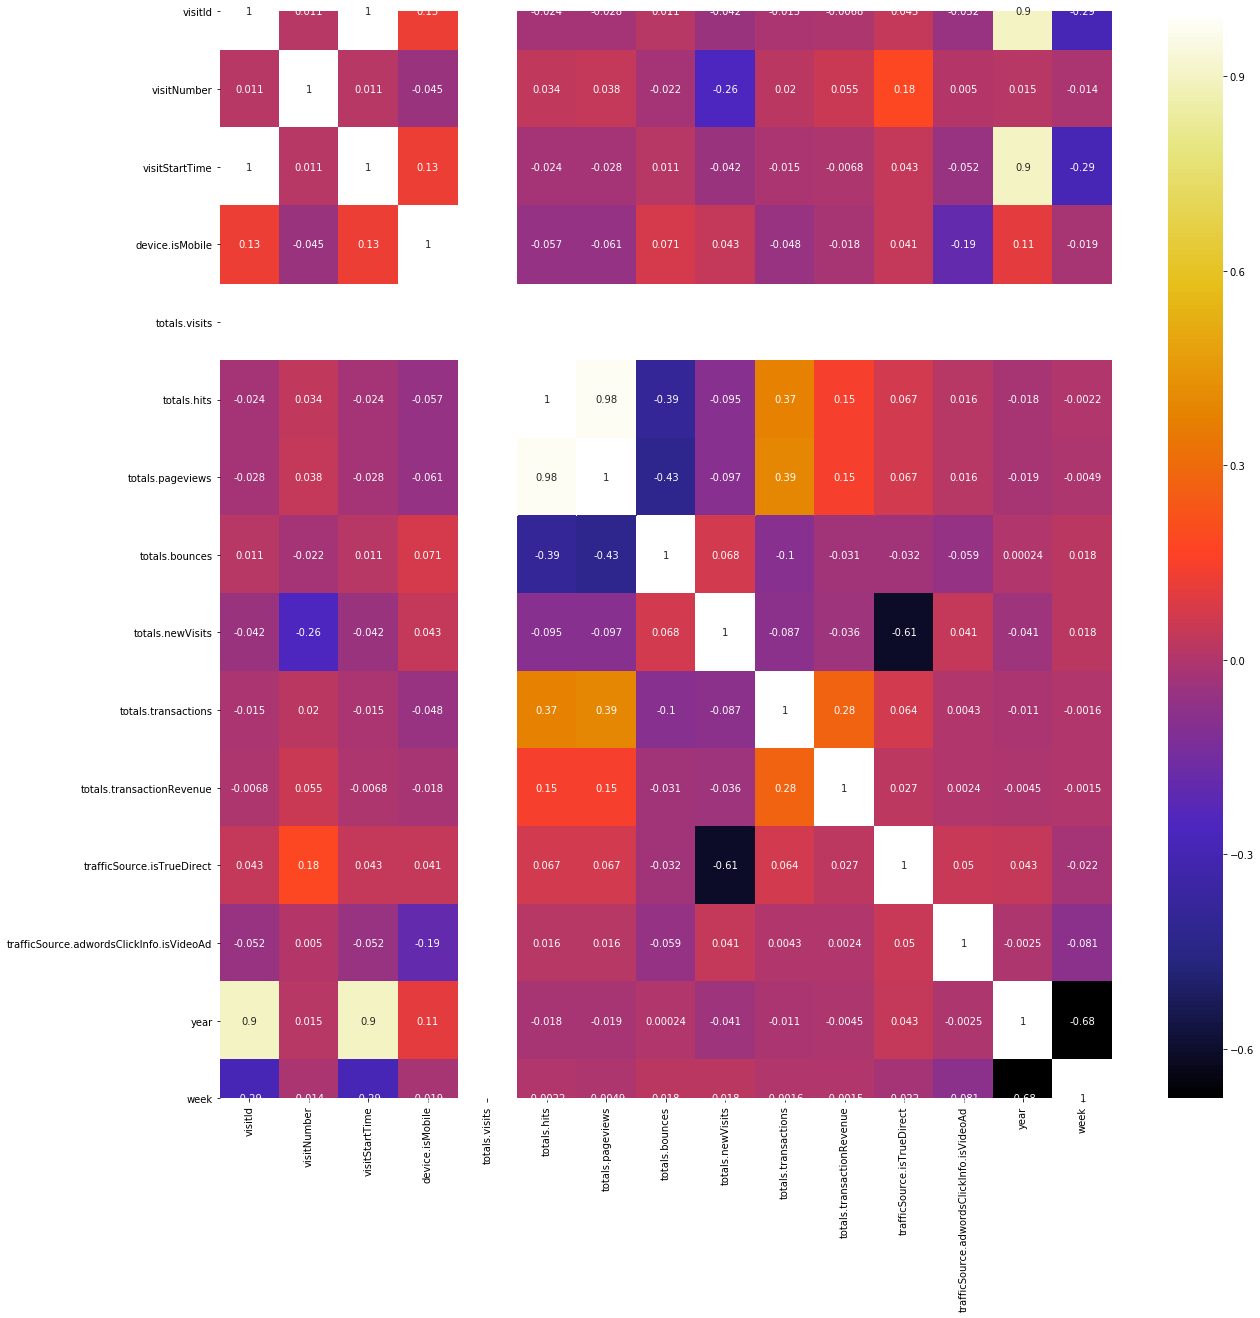

In [31]:
corrmat = Cleaned_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize = (20,20))
#plot heatmap

sns.heatmap(df_train[top_corr_feature].corr(),annot =True,cmap='CMRmap')


please interprete.........................................